In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("check_dijkstra.ipynb")

# Instructions

This assignment implements Dijkstra's shortest path on a graph, finding an unvisited node in a graph, picking which one to visit, and taking a path in the map and generating waypoints along that path

Given to you:
- Priority queue
- Image handling
- Four and eight connected neighbors

Slides: https://docs.google.com/presentation/d/1XBPw2B2Bac-LcXH5kYN4hQLLLl_AMIgoowlrmPpTinA/edit?usp=sharing


In [2]:
# The ever-present numpy
import numpy as np

# Our priority queue
import heapq

# Using imageio to read in the image
import imageio

# Operating system commands
import os


In [3]:
# These commands will force JN to actually re-load the external file when you re-execute the import command
%load_ext autoreload
%autoreload 2

# Run Dijkstra on a pretend SLAM map



In [4]:
if os.path.exists("path_planning.py"):
    from path_planning import dijkstra, plot_with_path, open_image, check_path_continuous
else:
    cur_dir = os.getcwd()
    if "Assignments" in cur_dir or "Skills" in cur_dir:
        path_planning_dir = "../ros_ws/src/lab3/lab3"

        os.chdir(path_planning_dir)
        from path_planning import dijkstra, plot_with_path, open_image, check_path_continuous
        os.chdir(cur_dir)

c:\Users\maddi\Documents\osu\year4_classes\rob\ROB456\Assignments


Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


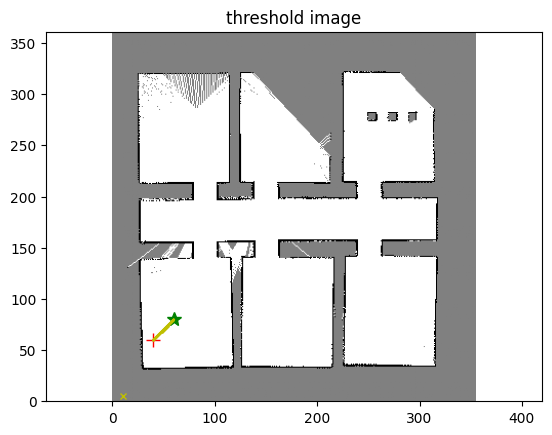

In [5]:
# Opens and threshold the SLAM map image
_, im_thresh = open_image("map.pgm")

# GUIDE:
#.  Try the different start/goal locations. 
robot_start_loc = (40, 60)
# Closer one to try - change this after it works...
robot_goal_loc_close = (60, 80)
robot_goal_hallway = (80, 175)
robot_goal_next_room = (130, 50)
zoom = 1.0

robot_goal_loc = robot_goal_loc_close
path = dijkstra(im_thresh, robot_start_loc, robot_goal_loc)
plot_with_path(im_thresh, zoom=zoom, robot_loc=robot_start_loc, goal_loc=robot_goal_loc, path=path)

# NOTE: The path is correct if it is connected, doesn't loop back on itself, gets to the goal, and is "snapped" to the edges


In [6]:
grader.check("dijkstra")

dijkstra results: All test cases passed!

## Reachability test

Sometimes you'll put in a goal position that seems like it's free, but it's not actually reachable. This test checks that your code finds a reasonable path if the end goal is not reachable. This is the code that gets called when goal_loc is not visited:

    if not goal_loc in visited:
        print(f"Goal {goal_loc} not reached, taking closest")

Note: This test will be SLOW

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


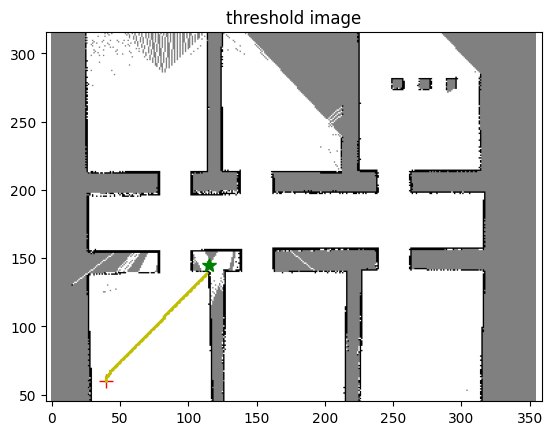

In [7]:
loc_not_reachable = (115, 145)
path_not_reachable = dijkstra(im_thresh, (40, 60), (115, 145))
plot_with_path(im_thresh, zoom=0.75, robot_loc=robot_start_loc, goal_loc=loc_not_reachable, path=path_not_reachable)


In [8]:
grader.check("end_point_not_valid")

end_point_not_valid results: All test cases passed!

## Hours and collaborators
Required for every assignment - fill out before you hand-in.

Listing names and websites helps you to document who you worked with and what internet help you received in the case of any plagiarism issues. You should list names of anyone (in class or not) who has substantially helped you with an assignment - or anyone you have *helped*. You do not need to list TAs.

Listing hours helps us track if the assignments are too long.

In [9]:

# List of names (create"s a set)
worked_with_names = {"Lara Rupnawar"}
# List of URLS W26 (creates a set)
websites = {"None"}
# Approximate number of hours, including lab/in-class time
hours = 2

In [10]:
grader.check("hours_collaborators")

hours_collaborators results: All test cases passed!

### To submit

- Do a restart then run all to make sure everything runs ok
- Save the file
- Submit this .ipynb file and path_planning.py through gradescope, Dijkstra
- You do NOT need to submit the data files - we will supply those
- Take out/suppress all print statements
- Make sure your final image with path is visible - this is an entirely manually graded assignment

If the Gradescope autograder fails, please check here first for common reasons for it to fail
    https://docs.google.com/presentation/d/1tYa5oycUiG4YhXUq5vHvPOpWJ4k_xUPp2rUNIL7Q9RI/edit?usp=sharing

Most likely failure for this assignment is not naming the data directory and files correctly; capitalization matters for the Gradescope grader. 

Second most likely failure is because your code ran very, very slowly and the autograder timed out.

Third reason for failure is you forgot to include **path_planning.py** and/or you put the file in a folder